# Environment Setup

## Import Libraries

In [15]:
from pytrends.request import TrendReq
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud

from selenium import webdriver
import time

## Utility Functions

In [16]:
def get_cookie():
    options = webdriver.ChromeOptions()
    options.add_argument("--headless")
    driver = webdriver.Chrome(options=options)
    driver.get("https://trends.google.com/")
    time.sleep(5)
    cookie = driver.get_cookie("NID")["value"]
    driver.quit()
    return cookie

In [17]:
# Initialize pytrends request
def get_pytrends_request():
    nid_cookie = f"NID={get_cookie()}"
    pytrends = TrendReq(hl='en-US', tz=360, requests_args={"headers": {"Cookie": nid_cookie}})
    return pytrends 

In [18]:
def build_pytrends_payload(pytrends,keyword):
     pytrends.build_payload([keyword], cat=0, timeframe='2020-01-01 2024-01-01', geo='', gprop='')

# Scrapping Data

In [14]:
# Define the keywords to search for

keywords = [
    "Indigenous recipes Canada",
    "Traditional Aboriginal food",
    "Native Canadian cuisine",
    "First Nations recipes",
    "Métis cuisine",
]


In [19]:
# Build the payload
pytrends = get_pytrends_request()
pytrends.build_payload(keywords, cat=0, timeframe='today 12-m', geo='', gprop='')

In [20]:
# Get interest over time
interest_over_time_df = pytrends.interest_over_time()
interest_over_time_df.head()

/Users/rahul_somanathan/Blackhole/Lambton/WIL/CodeBase/recipe-recommendation-engine/.conda/lib/python3.11/site-packages/pytrends/request.py:260: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df = df.fillna(False)


,Indigenous recipes Canada,Traditional Aboriginal food,Native Canadian cuisine,First Nations recipes,Métis cuisine,isPartial
date,,,,,,
2023-07-02,0,0,0,0,0,False
2023-07-09,0,0,0,0,0,False
2023-07-16,0,0,0,0,0,False
2023-07-23,0,0,0,0,0,False
2023-07-30,0,0,0,0,0,False


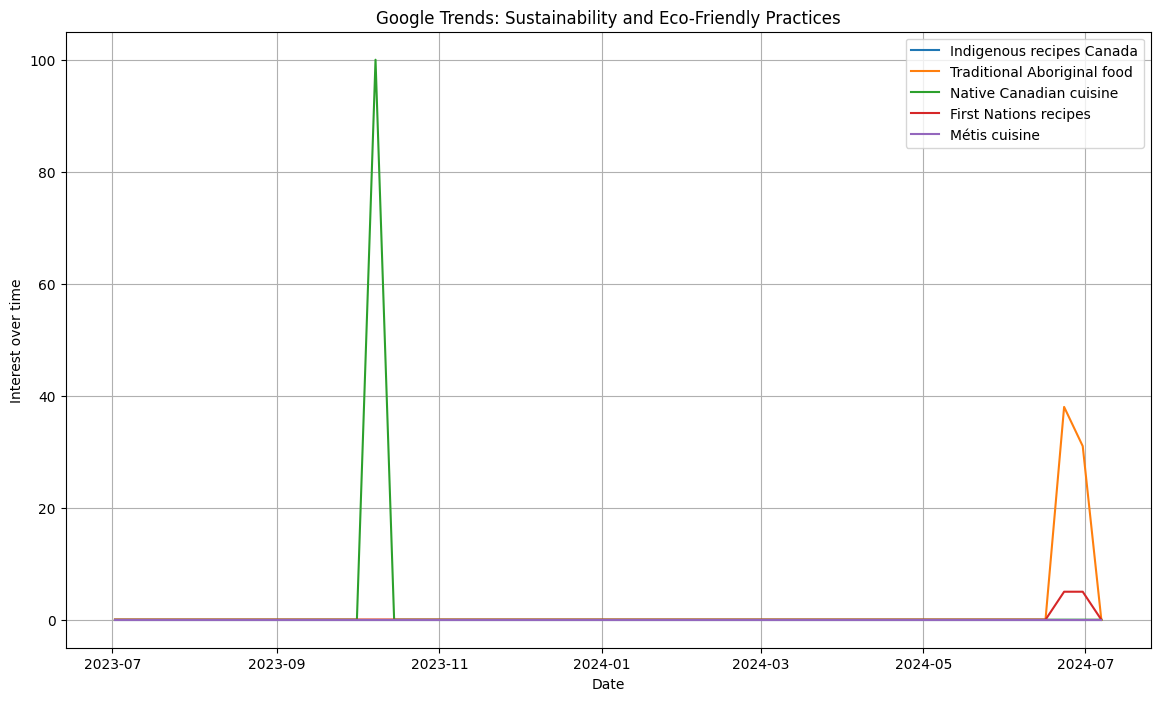

In [21]:
# Plot Interest over time
plt.figure(figsize=(14, 8))
for keyword in keywords:
    if keyword in interest_over_time_df:
        plt.plot(interest_over_time_df[keyword], label=keyword)

plt.title('Google Trends: Sustainability and Eco-Friendly Practices')
plt.xlabel('Date')
plt.ylabel('Interest over time')
plt.legend()
plt.grid(True)
plt.show()

In [22]:
# Get related queries
related_queries_dict = {}
count = 1
total_keyword_len = len(keywords)
for keyword in keywords:
    try:
        print('*************************************************')
        print(f'Search Keyword: {keyword} | Progress: {count}/{total_keyword_len}')
        #pytrends.build_payload([keyword], cat=0, timeframe='2020-01-01 2024-01-01', geo='', gprop='')
        pytrends = get_pytrends_request()
        build_pytrends_payload(pytrends,keyword)
        related_queries = pytrends.related_queries()
        related_queries_dict[keyword] = related_queries[keyword]['top']
        print(related_queries)
        print('-------------------------------------------------')
        print(related_queries_dict)
        print('*************************************************')
        count += 1
    except KeyError:
        print(f"No related queries found for {keyword}")


# Display related queries
for keyword in keywords:
    if keyword in related_queries_dict and related_queries_dict[keyword] is not None:
        print(f"Top related queries for {keyword}:")
        print(related_queries_dict[keyword])
    else:
        print(f"No related queries data for {keyword}")


*************************************************
Search Keyword: Indigenous recipes Canada | Progress: 1/5
{'Indigenous recipes Canada': {'top': None, 'rising': None}}
-------------------------------------------------
{'Indigenous recipes Canada': None}
*************************************************
*************************************************
Search Keyword: Traditional Aboriginal food | Progress: 2/5


TooManyRequestsError: The request failed: Google returned a response with code 429

In [ ]:
related_queries

In [ ]:
# Combine related queries into a single text
all_related_queries = ' '.join(
    [' '.join(related_queries_dict[keyword]['query'].tolist()) for keyword in related_queries_dict if related_queries_dict[keyword] is not None]
)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_related_queries)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Related Queries')
plt.show()


In [ ]:

rising_queries_dict = {}
count = 1
total_keyword_len = len(keywords)
try:
    for keyword in keywords:
        #pytrends.build_payload([keyword], timeframe='today 1-m', geo='US')  # Adjust timeframe and geo as needed

        print('*************************************************')
        print(f'Search Keyword: {keyword} | Progress: {count}/{total_keyword_len}')
        
        pytrends = get_pytrends_request()
        build_pytrends_payload(pytrends,keyword)
        
        related_queries = pytrends.related_queries()
        
        # Check if there are rising queries for the current keyword
        if keyword in related_queries and related_queries[keyword] is not None and 'rising' in related_queries[keyword]:
            rising_queries_dict[keyword] = related_queries[keyword]['rising']
        else:
            rising_queries_dict[keyword] = []

        print(related_queries)
        print('-------------------------------------------------')
        print(related_queries_dict)
        count += 1
except Exception as e:
    print(f"Error fetching rising queries: {str(e)}")

# Display rising queries
for keyword in keywords:
    if keyword in rising_queries_dict:
        print(f"Rising queries for {keyword}:")
        print(rising_queries_dict[keyword])

In [ ]:
# Combine related queries into a single text
all_rising_queries = ' '.join(
    [' '.join(rising_queries_dict[keyword]['query'].tolist()) for keyword in rising_queries_dict if rising_queries_dict[keyword] is not None]
)

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_related_queries)

# Display word cloud
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Rising Queries')
plt.show()


In [ ]:
# Get interest by region
interest_by_region_df = pytrends.interest_by_region()
print(interest_by_region_df.head())

In [ ]:
# Plot interest by region
for keyword in keywords:
    df = interest_by_region_df[keyword].nlargest(10)
    df.plot(kind='bar', figsize=(10, 6), legend=False, title=f'Top 10 Regions for {keyword}')
    plt.xlabel('Region')
    plt.ylabel('Interest')
    plt.grid(True)
    plt.show()

In [ ]:
# Get related queries
related_queries_dict = pytrends.related_queries()
for keyword in keywords:
    print(f"Related queries for {keyword}:")
    print(related_queries_dict[keyword]['top'].head())

In [ ]:
# Get trending searches
trending_searches_df = pytrends.trending_searches()
print("Trending Searches:")
print(trending_searches_df.head())

In [ ]:
# Get top charts
top_charts_df = pytrends.top_charts(2023, hl='en-US', tz=360)
print("Top Charts for 2023:")
print(top_charts_df.head())

In [ ]:
# Get keyword suggestions
for keyword in keywords:
    suggestions = pytrends.suggestions(keyword)
    print(f"Suggestions for {keyword}:")
    print(suggestions)